# Principal Component Anlysis
## Introduction
Suppose our $n$ feature vectors $\underset{\sim}{x_1}, \ \underset{\sim}{x}_2, \ \underset{\sim}{x}_3, \ ...,\ \underset{\sim}{x}_n$ are 2 dimensional. As, we always prefer to create model with fewer number of variables whenever possible, we want to drop one among the two regressors. Now consider, two cases,

### Case 1
![](https://raw.githubusercontent.com/kkhatua98/All/main/Original.png)
We see that, variance in x_2 is much less than x_1; ie. x_2 remain more or less same even if the dependent variable $y$ changes. In simple terms $y$ does not dependent on x_2 as it depends on x_1. Here we can even say that, it does not depend at all (with little risk). So, we can safely drop it.

### Case 2
Now suppose now scatter plot x_1 vs x_2 looks like this,
![](https://raw.githubusercontent.com/kkhatua98/All/main/Rotated.png)
Here we cannot say that variance of one variable is much less than the other, there is enough variance in both of the axis. But suppose we are desparate to drop one of the variable. If we consider the red arrow direction in the picture, we see that in this direction variation is much less than the blue arrow direction. This observation is the key to the Principal Component Analysis. If we rotate our axis so that our x_1 axis meets blue arrow and the x_2 axis meets the red arrow, then in the resulting rotated axis we can drop the rotated x_2 axis. Also we can rotate so that we drop the x_1 axis. But we take the approach to drop the later variable (x_2). If we generalise the above concept for multivariate set up, we get,

**Rotate the original axes so that variance of the first rotated axis > variance of the next rotated axis > ... and so on.**


## Doing the Mathematics
Suppose $\vec{x}$ is our p dimensional feature vector. We want to rotate our original axes, ie. we want a orthogonal matrix $Q$ (ie. $Q^TQ = I$) such that,
$$Q.\vec{x} = \begin{pmatrix} \vec{Q_1} \\ \vec{Q_2} \\ \vec{Q_3} \\ . \\ . \\ . \\ \vec{Q_p} \end{pmatrix}.\vec{x} = \begin{pmatrix} \vec{Q_1}.\vec{x} \\ \vec{Q_2}.\vec{x} \\ \vec{Q_3}.\vec{x} \\ . \\ . \\ . \\ \vec{Q_p}.\vec{x} \end{pmatrix} = \begin{pmatrix} P_1\\ P_2 \\ P_3 \\ . \\ . \\ . \\ P_n \end{pmatrix} = \vec{P}$$
$$\text{Here $Q_i$s are row vectors and $P_i$s are scalar}$$

Now we have to determine a $Q$ so that in $P$, $var(P_1) > var(P_2) > var(P_3) > ... > var(P_p)$



**Note:** Here sum of variances of $P_i$s and sum of variances of the original $x_i$ are same. As,
$$\sum_{i=1}^{p} var(P_i) = Trace(var(Q.\vec{x})) = Trace(Q\Sigma Q^T) = Trace(Q^TQ\Sigma) = Trace(\Sigma) = \sum_{i=1}^p var(x_i)$$
$\Sigma$ is the variance covariance matrix of $\vec{x}$.

### Getting the First Axis:
$var(P_1) = var(\vec{Q_1}.\vec{x}) = Q_1.var(\vec{x}).Q_1^T = \underbrace{Q_1.\Sigma Q_1^T = Q_1ED_{\lambda}E^TQ_1^T}_{\text{by Eigendecomposition of $\Sigma$. (1)}} = AD_{\lambda}A^T (2) = \sum_{i=1}^p \lambda_iA_i^2 \le \lambda_{hi}\sum_{i=1}^{p}A_i^2 = \lambda_{hi}.1 = \lambda_{hi}$

Here, $A = Q_1.E \ \text{(note, this is a column vector)} \\ D_{\lambda} = \text{Diagonal matrix of eigen values} = diag(\lambda_1, \lambda_2, \lambda_3, ... , \lambda_p) \\ E = \text{Orthogonal matrix of eigen vectors} = (E_1, E_2, E_3, ..., E_p), \text{where $E_i$ is the eigen vector corresponding to $\lambda_i$} \\ and, \ \sum_{i=1}^pA_i^2 = A^T.A = \underbrace{Q_1.E.E^TQ_1^T = Q_1.I.Q_1^T}_{\text{$E$ is orthogonal matrix}} = Q_1.Q_1^T = 1 \\ \text{$hi$, is the index for which $\lambda$ is maximum}$

Now, suppose $E_{hi}$ is the eigen vector corresponding to $\lambda_{hi}$.

Then,$var(E_{hi}^T.\vec{x}) = E_{hi}^T\Sigma E_{hi} = E_{hi}^TED_{\lambda}E^TE_{hi} = E_{hi}^T(E_1 \ E_2 \ E_3 \ ... \ E_{hi} \ ... \ E_p)D_{\lambda}\begin{pmatrix}E_1^T \\ E_2^T \\ E_3^T \\ . \\ . \\ E_{hi}^T \\ . \\ . \\ . \\ E_p^T\end{pmatrix}E_{hri}= \vec{e}_{hi}^TD_{\lambda}\vec{e}_{hi} = \lambda_{hi}$

Here, only jth entry of $e_j$ is 1, rest are 0.

So, the first Principal Component $Q_1=E_{hi}^T$

### Getting the Second Axis
$Q$ is orthogonal matrix, so, $Q_2.Q_1^T=0; \ Q_2.E_{hi}=0$.
Now,
$$var(P_2) = var(\vec{Q_2}.\vec{x}) = \vec{Q}_2.\Sigma.\vec{Q}_2^T = \vec{Q}_2ED_{\lambda}E^T.\vec{Q}_2^T = \vec{Q}_2(E_1 \ E_2 \ E_3 \ ... \ E_{hi} \ ... \ E_p)D_{\lambda}\begin{pmatrix}E_1^T \\ E_2^T \\ E_3^T \\ . \\ . \\ E_{hi}^T \\ . \\ . \\ . \\ E_p^T\end{pmatrix}Q_2^T = (\vec{Q}_2.E_1 \ \ \ \vec{Q}_2.E_2 \ \ \ \vec{Q}_2.E_3 \ \ \ ... \ \ \ \vec{Q}_2E_{hi} \ ... \ \vec{Q}_2E_p)D_{\lambda}\begin{pmatrix}\vec{Q}_2^T.E_1^T \\ \vec{Q}_2^T.E_2^T \\ \vec{Q}_2^T.E_3^T \\ . \\ . \\ \vec{Q}_2^T.E_{hi}^T \\ . \\ . \\ . \\ \vec{Q}_2^T.E_p^T\end{pmatrix}=(\vec{Q}_2.E_1 \ \ \ \vec{Q}_2.E_2 \ \ \ \vec{Q}_2.E_3 \ \ \ ... \ \ \ 0 \ ... \ \vec{Q}_2E_p)D_{\lambda}\begin{pmatrix}\vec{Q}_2^T.E_1^T \\ \vec{Q}_2^T.E_2^T \\ \vec{Q}_2^T.E_3^T \\ . \\ . \\ 0 \\ . \\ . \\ . \\ \vec{Q}_2^T.E_p^T\end{pmatrix}=A_*D_{\lambda}A_*^T=\sum_{i=1 \\ i \neq hi}^p \lambda_iA_{*i}^2 \le \lambda_{hi_2}\sum_{i=1 \\ i \neq hi}^p A_{*i}^2 = \lambda_{hi_2}.1 = \lambda_{hi_2}$$
where, $\text{$\lambda_{hi_2}$ is the second highest eigen value and $hi_2$ is the index of it} \\ \sum_{i=1 \\ i \neq hi}^p A_{*i}^2 = A_*^T.A_* = \underbrace{Q_2.E.E^TQ_2^T = Q_2.I.Q_2^T}_{\text{$E$ is orthogonal matrix}} = Q_2.Q_2^T = 1$

Now, suppose $E_{hi_2}$ is the eigen vector corresponding to $\lambda_{hi}$.

Then,$var(E_{hi_2}^T.\vec{x}) = E_{hi_2}^T\Sigma E_{hi_2} = E_{hi_2}^TED_{\lambda}E^TE_{hi_2} = E_{hi_2}^T(E_1 \ E_2 \ E_3 \ ... \ E_{hi_2} \ ... \ E_p)D_{\lambda}\begin{pmatrix}E_1^T \\ E_2^T \\ E_3^T \\ . \\ . \\ E_{hi_2}^T \\ . \\ . \\ . \\ E_p^T\end{pmatrix}E_{hi_2}= \vec{e}_{hi_2}^TD_{\lambda}\vec{e}_{hi_2} = \lambda_{hi_2}$

Here, only jth entry of $e_j$ is 1, rest are 0.

So, the first Principal Component $Q_2=E_{hi_2}^T$

**Note:**

$cov(P_1, \ P_2) = cov(\vec{Q}_1.\vec{x}, \vec{Q_2}.\vec{x}) = cov(\vec{E}_{hi}^T.\vec{x}, \vec{E}_{hi_2}^T.\vec{x}) = \vec{E}_{hi}^T.\Sigma \vec{E}_{hi_2} = E_{hi}^T(\vec{E}_1 \ \vec{E}_2 \ \vec{E}_3 \ ... \ \vec{E}_{hi} \ ... \ \vec{E}_p)D_{\lambda}\begin{pmatrix}\vec{E}_1^T \\ \vec{E}_2^T \\ \vec{E}_3^T \\ . \\ . \\ \vec{E}_{hi_2}^T \\ . \\ . \\ . \\ \vec{E}_p^T\end{pmatrix}.\vec{E}_{hi_2} = (0 \ 0 \ 0 \ ... \ 1 \ ... \ 0)D_{\lambda}\begin{pmatrix}0 \\ 0 \\ 0 \\ . \\ . \\ 1 \\ . \\ . \\ . \\ 0\end{pmatrix}=\underbrace{(0 \ 0 \ 0 \ ... \ 1 \ ... \ 0)}_{\text{1 in $hi$ position}}\underbrace{\begin{pmatrix}0 \\ 0 \\ 0 \\ . \\ . \\ \lambda_{hi_2} \\ . \\ . \\ . \\ 0\end{pmatrix}}_{\text{$\lambda_{hi_2}$ in $hi_2$ position}}=0$, ie covariance is 0, so correlation is also 0.

So, one advantage of this rotation is that the resulting axes become **uncorrelated** (not independent). Here we should not get confuse with the concept of orthogonality and uncorrelatedness. Orthogonality is a geometrical concept, where uncorrelatedness is statistical concept. Also, we can rotate the axes in a direction, such that the resulting axes are correlated.

Like this we can calculate the remaining Principal Components.

## How to Calculate Principal Components for Data
Of course when we have data, we do not know the $\Sigma$ matrix, so we can not calculate the original Principal Components. One obvious choice is that we estimate $\Sigma$ with sample covariance matrix $$\hat{\Sigma} = S = \frac{1}{n - 1}\sum_{i=1}^n (\vec{x}_i - \bar{x}).(\vec{x}_i - \bar{x})^T$$
and calculate the eigenvalue, eigenvectors of $S$.

### Calculating Principal Components manually and with Scikit-Learn on a dataset.
Loading data

In [1]:
import pandas

# Loading data
data = pandas.read_csv("https://raw.githubusercontent.com/kkhatua98/All/main/Transformed_Data.csv")
data.head()

,x_1,x_2
0,-3.995782,-5.632142
1,-3.496130,-5.124706
2,3.630809,8.009889
3,3.755696,6.889920
4,-1.945930,-3.323225


Visualising Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'x_2')

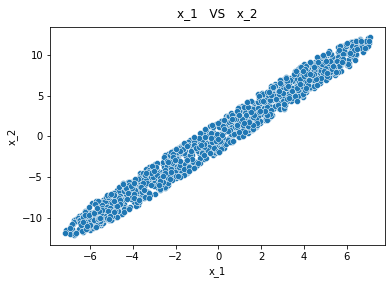

In [3]:
import matplotlib.pyplot as plt
import seaborn


plot = seaborn.scatterplot(data["x_1"], data["x_2"])
plot.set_title("x_1   VS   x_2", y = 1.02)
plot.set_xlabel("x_1")
plot.set_ylabel("x_2")
plt.xlabel("x_1")
plt.ylabel("x_2")

Calculating Q manually

In [7]:
import numpy

covariance_matrix = data.cov()

# Calculating the eigenvalues and eigenvectors
eigenvalues, eigenvectors = numpy.linalg.eig(covariance_matrix)

# In eigenvalues values are not sorted, but we need in sorted order.
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# In eigenvectors eigenvectors are stored columnwise. But in Q eigenvectors are stored rowsise.
# So we have to transpose it.

Q_manual = eigenvectors.T

print(Q_manual)

[[-0.49748739 -0.86747121]
 [-0.86747121  0.49748739]]


Calculating Q from Sklearn

In [6]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(data)
print(pca.components_)

[[ 0.49748739  0.86747121]
 [ 0.86747121 -0.49748739]]


This two results may seem different at first, but note that, every row of pca.components_ is an eigenvector so, changing its sign does not change anything. So, we see that, the rotation matrix calculated manually and from Sklearn are same.